In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as power
from math import sqrt
%matplotlib inline

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.
Here is the data file. And here is the codebook, with information about the variable coding and content.
In this dataset, the same participants answered questions in 2012 and again 2014.
1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Submit a link to your work below.

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.year.unique()

array([6, 7])

## Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


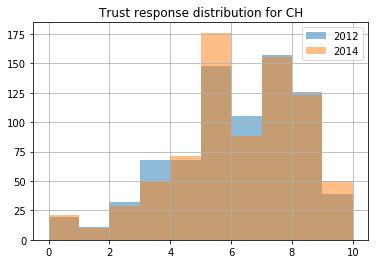

Ttest_indResult(statistic=-0.67827165846615045, pvalue=0.49770110247151234)
statistical power:  0.90793811125
KruskalResult(statistic=0.30163599644480188, pvalue=0.58285861114420479)
mean 2012:  5.67787839586 median 2012:  6.0
mean 2014:  5.75161707633 median 2014:  6.0


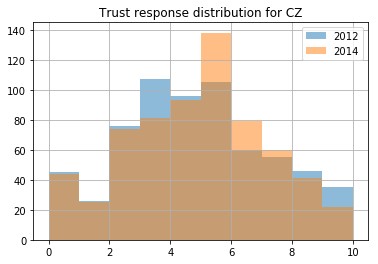

Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.63376636268565634)
statistical power:  0.864401731367
KruskalResult(statistic=0.72115913853012281, pvalue=0.39576395374563544)
mean 2012:  4.36251920123 median 2012:  4.0
mean 2014:  4.42465753425 median 2014:  5.0


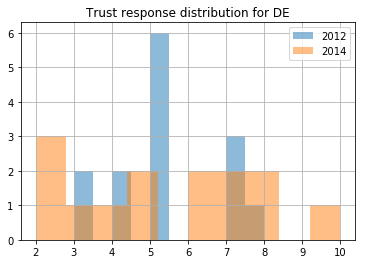

Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
statistical power:  0.876362365367
KruskalResult(statistic=0.03493591039585809, pvalue=0.85173001912501989)
mean 2012:  5.21428571429 median 2012:  5.0
mean 2014:  5.35714285714 median 2014:  5.5


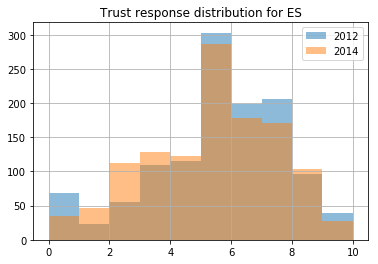

Ttest_indResult(statistic=2.4942765167160021, pvalue=0.012687599930326627)
statistical power:  1.0
KruskalResult(statistic=8.216087354735361, pvalue=0.0041520627675982)
mean 2012:  5.11459192086 median 2012:  5.0
mean 2014:  4.89512799339 median 2014:  5.0


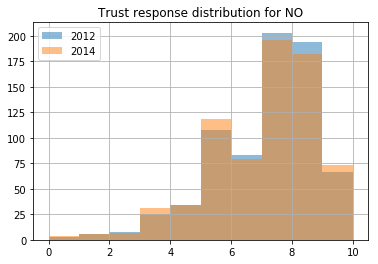

Ttest_indResult(statistic=0.54376698652837441, pvalue=0.58668496359882139)
statistical power:  0.840995230475
KruskalResult(statistic=0.24473874253133701, pvalue=0.62080430049698654)
mean 2012:  6.64931506849 median 2012:  7.0
mean 2014:  6.59863013699 median 2014:  7.0


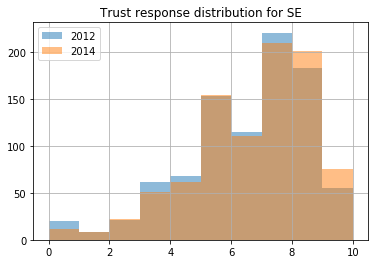

Ttest_indResult(statistic=-2.0891648431279979, pvalue=0.036832086995203711)
statistical power:  0.9999439862
KruskalResult(statistic=4.2412547110440508, pvalue=0.03945299959307013)
mean 2012:  6.05849889625 median 2012:  7.0
mean 2014:  6.2577092511 median 2014:  7.0


In [27]:
countries = list(df.cntry.unique())

#Split data into groups and eliminate null values.
data12 = df[df.year==6][df.ppltrst.notnull()]
data14 = df[df.year==7][df.ppltrst.notnull()]
data = df[df.ppltrst.notnull()]

for country in countries:
    data12[data12.cntry == country].ppltrst.hist(alpha=.5, label='2012')
    data14[data14.cntry == country].ppltrst.hist(alpha=.5, label='2014')
    plt.legend();
    plt.title('Trust response distribution for {}'.format(country));
    plt.show();
    ttest_res = stats.ttest_ind(data12[data12.cntry == country].ppltrst, data14[data14.cntry == country].ppltrst)
    print(ttest_res)
    alpha = ttest_res[1]
    pooled_SD = sqrt((data12[data12.cntry == country].ppltrst.std()+data14[data14.cntry == country].ppltrst.std())/2)
    effect_size = abs(data12[data12.cntry == country].ppltrst.mean() - data14[data14.cntry == country].ppltrst.mean()) / pooled_SD
    print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(data[data.cntry==country]), alpha=alpha, power=None, alternative='two-sided'))
    print(stats.kruskal(data12[data12.cntry == country].ppltrst, data14[data14.cntry == country].ppltrst))
    print('mean 2012: ', data12[data12.cntry == country].ppltrst.mean(), 
          'median 2012: ', data12[data12.cntry == country].ppltrst.median())
    print('mean 2014: ', data14[data14.cntry == country].ppltrst.mean(),
         'median 2014: ', data14[data14.cntry == country].ppltrst.median())

A visual inspection suggests no major changes for each country from year to year, with the exception of DE (but there is no obvious movement in one direction for that particular country.) The distributions do not look normal, so I included the non-parametric Kruskal-Wallace test. The only significant (p <. 05) results are spain (ES) and Sweden (SE). We see the mean value in Spain decreased slightly from 5.1 in 2012 to 4.9 in 2014, and the median response moved from 5.0 to 4.9 between the two instances. This change is much more significant (p=.004) than Sweden (p=.04) and easier to interpret, as the shift in mean and median in Swedish responses are incongruent.

## Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


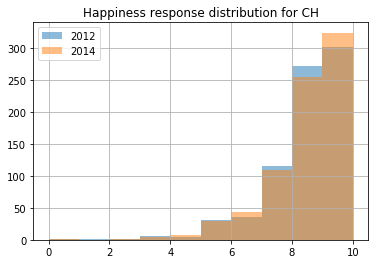

Ttest_indResult(statistic=-0.38839167327065438, pvalue=0.69777985525546837)
statistical power:  0.799016047338
KruskalResult(statistic=0.22331955287588717, pvalue=0.63652214320425471)
mean 2012:  8.08831168831 median 2012:  8.0
mean 2014:  8.11642949547 median 2014:  8.0


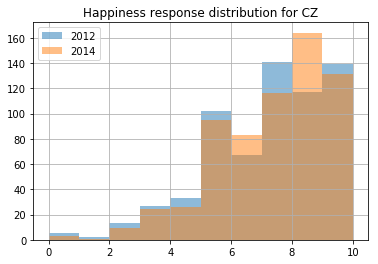

Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243592707)
statistical power:  0.990973996606
KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800354)
mean 2012:  6.77089783282 median 2012:  7.0
mean 2014:  6.91411042945 median 2014:  7.0


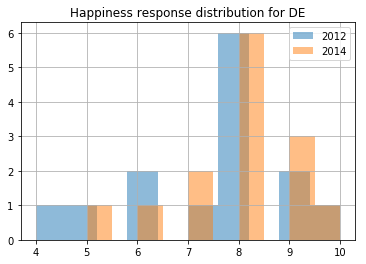

Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.45124604112083799)
statistical power:  0.870148558762
KruskalResult(statistic=0.39056749122656015, pvalue=0.53200125505866203)
mean 2012:  7.42857142857 median 2012:  8.0
mean 2014:  7.85714285714 median 2014:  8.0


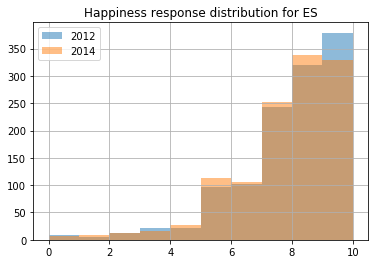

Ttest_indResult(statistic=1.6739845099484869, pvalue=0.094262762069293307)
statistical power:  0.998313820717
KruskalResult(statistic=4.0892036411772681, pvalue=0.043157971896250848)
mean 2012:  7.54867986799 median 2012:  8.0
mean 2014:  7.4199669967 median 2014:  8.0


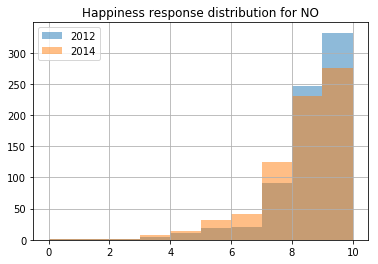

Ttest_indResult(statistic=4.2653916498196898, pvalue=2.1241259786815807e-05)
statistical power:  1.0
KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05)
mean 2012:  8.25171939477 median 2012:  8.0
mean 2014:  7.91518467852 median 2014:  8.0


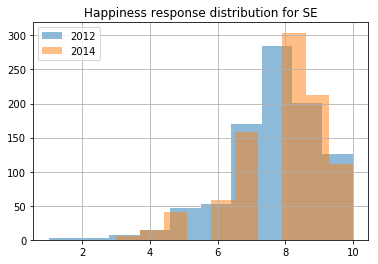

Ttest_indResult(statistic=-0.57486854012920952, pvalue=0.5654516534862527)
statistical power:  0.817756639547
KruskalResult(statistic=0.050457345200528352, pvalue=0.82226936153714048)
mean 2012:  7.90738699008 median 2012:  8.0
mean 2014:  7.94696132597 median 2014:  8.0


In [26]:
#Split data into groups and eliminate null values.
data12 = df[df.year==6][df.happy.notnull()]
data14 = df[df.year==7][df.happy.notnull()]
data = df[df.happy.notnull()]

for country in countries:
    data12[data12.cntry == country].happy.hist(alpha=.5, label='2012')
    data14[data14.cntry == country].happy.hist(alpha=.5, label='2014')
    plt.legend();
    plt.title('Happiness response distribution for {}'.format(country));
    plt.show();
    ttest_res = stats.ttest_ind(data12[data12.cntry == country].happy, data14[data14.cntry == country].happy)
    print(ttest_res)
    alpha = ttest_res[1]
    pooled_SD = sqrt((data12[data12.cntry == country].happy.std()+data14[data14.cntry == country].happy.std())/2)
    effect_size = abs(data12[data12.cntry == country].happy.mean() - data14[data14.cntry == country].happy.mean()) / pooled_SD
    print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(data[data.cntry==country]), alpha=alpha, power=None, alternative='two-sided'))
    
    print(stats.kruskal(data12[data12.cntry == country].happy, data14[data14.cntry == country].happy))
    print('mean 2012: ', data12[data12.cntry == country].happy.mean(), 
          'median 2012: ', data12[data12.cntry == country].happy.median())
    print('mean 2014: ', data14[data14.cntry == country].happy.mean(),
         'median 2014: ', data14[data14.cntry == country].happy.median())

I use the same for loop but change arguments around to look at changes in responses to "how happy are you (1-10)?"
Norway (NO) has notable statistics, with an overallThere is only one other p<.05 result, and it's ES (Spain), with an overall decrease in median response and mean response. However, the p value is right there at p=.04, and the histogram visualization doesn't make the distributions look very different. There do appear to be more "10"s in the 2012 distribution.

## Question 3: Who reported watching more TV in 2012, men or women?

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


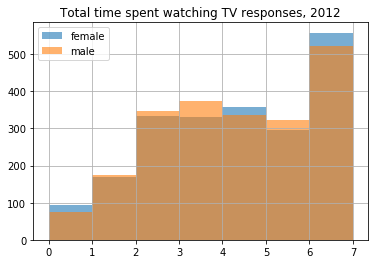

Ttest_indResult(statistic=0.68999281092095022, pvalue=0.49023604026969858)
statistical power:  0.901960736321
KruskalResult(statistic=0.57660910205494509, pvalue=0.44764452250079501)
mean female response:  3.94439252336 median female response:  4.0
mean male response:  3.90190609019 median male response:  4.0


In [31]:
#Get all 2012 responses w/ tvtot
data12 = df[df.year==6][df.tvtot.notnull()]

#assign into male/female groups
f12 = data12[data12.gndr==2]
m12 = data12[data12.gndr==1]

f12.tvtot.hist(alpha=.6, label='female', bins=7)
m12.tvtot.hist(alpha=.6, label='male', bins=7)
plt.title('Total time spent watching TV responses, 2012')
plt.legend();
plt.show();

ttest_res = stats.ttest_ind(f12.tvtot, m12.tvtot)
print(ttest_res)
alpha = ttest_res[1]
pooled_SD = sqrt((f12.tvtot.std()+m12.tvtot.std())/2)
effect_size = abs(f12.tvtot.mean() - m12.tvtot.mean()) / pooled_SD
print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(data12), alpha=alpha, power=None, alternative='two-sided'))

print(stats.kruskal(f12.tvtot, m12.tvtot))
print('mean female response: ', f12.tvtot.mean(), 
      'median female response: ', f12.tvtot.median())
print('mean male response: ', m12.tvtot.mean(),
     'median male response: ', m12.tvtot.median())

The Kruskal-Wallace test (used again because of the non-normal response distribution) suggests that we cannot reject the null hypothesis, and a visual inspection of the response distributions between the male and female groups seems to agree: there's no visible difference between the two distributions.

## Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


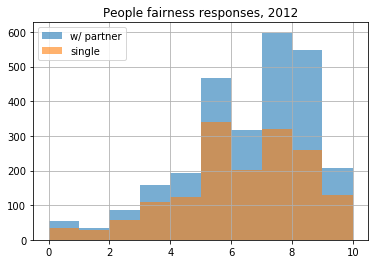

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.00090739526098837563)
statistical power:  1.0
KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)
mean single response:  5.85696517413 median single response:  6.0
mean partnered response:  6.08073601202 median partnered response:  7.0


In [32]:
#Get all 2012 responses w/ fairness response
data12 = df[df.year==6][df.pplfair.notnull()]

#assign into single/partner groups
p12 = data12[data12.partner==1]
s12 = data12[data12.partner==2]

p12.pplfair.hist(alpha=.6, label='w/ partner', bins=10)
s12.pplfair.hist(alpha=.6, label='single', bins=10)
plt.title('People fairness responses, 2012')
plt.legend();
plt.show();

ttest_res = stats.ttest_ind(p12.pplfair, s12.pplfair)
print(ttest_res)
alpha = ttest_res[1]
pooled_SD = sqrt((p12.pplfair.std()+s12.pplfair.std())/2)
effect_size = abs(p12.pplfair.mean() - s12.pplfair.mean()) / pooled_SD
print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(data12), alpha=alpha, power=None, alternative='two-sided'))


print(stats.kruskal(p12.pplfair, s12.pplfair))
print('mean single response: ', s12.pplfair.mean(), 
      'median single response: ', s12.pplfair.median())
print('mean partnered response: ', p12.pplfair.mean(),
     'median partnered response: ', p12.pplfair.median()) 

It looks like there's a strong tendency for people living with a partner to respond higher to the question, "do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair? (1-10)" This agrees with my expectation that more trusting people are more willing/likely to live with a partner.

## Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

I want to pick the countries with the most avialable samples for more play. Let's see.

In [34]:
data14 = df[df.year==7][df.sclmeet.notnull()]
data14.cntry.value_counts()

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


ES    1211
SE     908
CH     772
NO     731
CZ     655
DE      14
Name: cntry, dtype: int64

Based on these results and my criteria, it looks like Spain (ES), Sweden (SE), Switzerland (CH), and Norway (NO) are the best four to choose from.

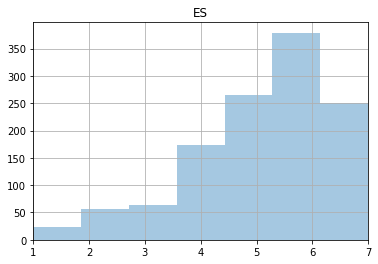

mean response for country ES:  5.26011560694
median response for country ES:  6.0
Ttest_indResult(statistic=2.9378171530419239, pvalue=0.0033229248999757095)
statistical power:  0.883871972082


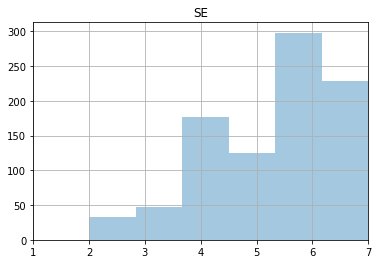

mean response for country SE:  5.42621145374
median response for country SE:  6.0
Ttest_indResult(statistic=6.3813166398909456, pvalue=1.9417740910163249e-10)
statistical power:  0.985761757234


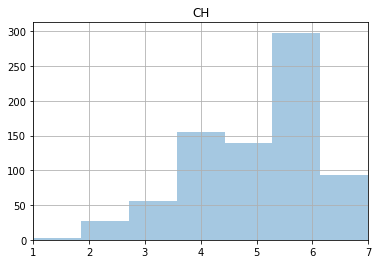

mean response for country CH:  5.16062176166
median response for country CH:  6.0
Ttest_indResult(statistic=0.065883637555893104, pvalue=0.94747353824476477)
statistical power:  0.947679650872


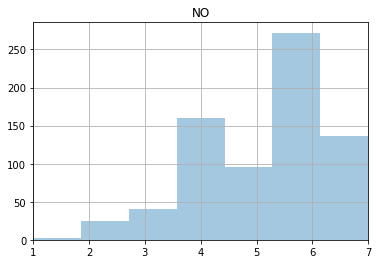

mean response for country NO:  5.3023255814
median response for country NO:  6.0
Ttest_indResult(statistic=2.9968117025319883, pvalue=0.0027438173503040899)
statistical power:  0.836741729976


KruskalResult(statistic=21.186241353532942, pvalue=9.6304263259085977e-05)

In [40]:
sel_countries = ['ES', 'SE', 'CH', 'NO']
for cntry in sel_countries:
    ax = plt.subplot(111)
    ax = data14[data14.cntry == cntry].sclmeet.hist(alpha=.4, label=cntry, bins=len(data14[data14.cntry == cntry].sclmeet.unique()));
    ax.set_xlim([1,7])
    plt.title(cntry)
    plt.show();
    print('mean response for country {}: '.format(cntry), data14[data14.cntry == cntry].sclmeet.mean())
    print('median response for country {}: '.format(cntry), data14[data14.cntry == cntry].sclmeet.median())
    
    ttest_res = stats.ttest_ind(data14[data14.cntry == cntry].sclmeet, data14[~(data14.cntry == cntry)].sclmeet)
    print(ttest_res)
    alpha = ttest_res[1]
    pooled_SD = sqrt((data14[data14.cntry == cntry].sclmeet.std()+data14[~(data14.cntry == cntry)].sclmeet.std())/2)
    effect_size = abs(data14[data14.cntry == cntry].sclmeet.mean() - data14[~(data14.cntry == cntry)].sclmeet.mean()) / pooled_SD
    print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(data14[data14.cntry == cntry]), alpha=alpha, power=None, alternative='two-sided'))

    
stats.kruskal(
    data14[data14.cntry == 'ES'].sclmeet,
    data14[data14.cntry == 'SE'].sclmeet,
    data14[data14.cntry == 'CH'].sclmeet,
    data14[data14.cntry == 'NO'].sclmeet
)

## Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? Submit a link to your work below.

In [41]:
# I'll pick the same set of countries as before for the same reason: big samples.
data14 = df[df.year==7][df.sclact.notnull()]
data14.cntry.value_counts()

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


ES    1185
SE     904
CH     765
NO     731
CZ     650
DE      14
Name: cntry, dtype: int64

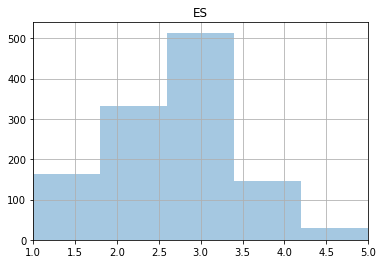

mean response for country ES:  2.61687763713
median response for country ES:  3.0
Ttest_indResult(statistic=-6.3980041030410408, pvalue=1.74456931615713e-10)
statistical power:  0.725443921373


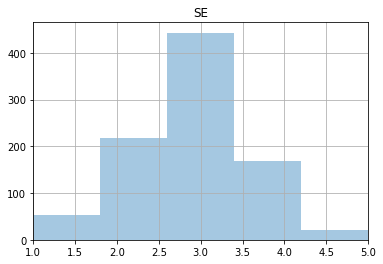

mean response for country SE:  2.87942477876
median response for country SE:  3.0
Ttest_indResult(statistic=4.6201971362959293, pvalue=3.9473411558830587e-06)
statistical power:  0.622532445453


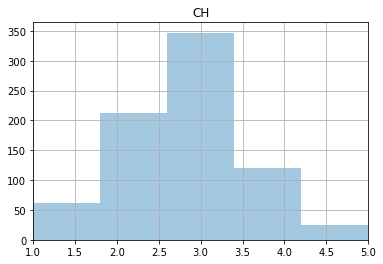

mean response for country CH:  2.78169934641
median response for country CH:  3.0
Ttest_indResult(statistic=0.82210201519034054, pvalue=0.41106498932224511)
statistical power:  0.560199854088


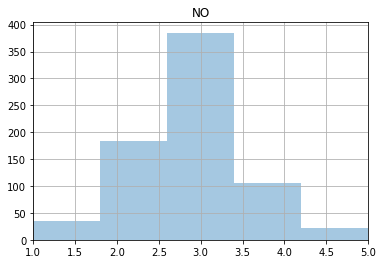

mean response for country NO:  2.85909712722
median response for country NO:  3.0
Ttest_indResult(statistic=3.3713359713347684, pvalue=0.00075472813980869693)
statistical power:  0.569026273741


KruskalResult(statistic=51.435463080120996, pvalue=3.9510495801311239e-11)

In [42]:
for cntry in sel_countries:
    ax = plt.subplot(111)
    ax = data14[data14.cntry == cntry].sclact.hist(alpha=.4, label=cntry, bins=len(data14[data14.cntry == cntry].sclact.unique()));
    ax.set_xlim([1,5])
    plt.title(cntry)
    plt.show();
    print('mean response for country {}: '.format(cntry), data14[data14.cntry == cntry].sclact.mean())
    print('median response for country {}: '.format(cntry), data14[data14.cntry == cntry].sclact.median())
    
    ttest_res = stats.ttest_ind(data14[data14.cntry == cntry].sclact, data14[~(data14.cntry == cntry)].sclact)
    print(ttest_res)
    alpha = ttest_res[1]
    pooled_SD = sqrt((data14[data14.cntry == cntry].sclact.std()+data14[~(data14.cntry == cntry)].sclact.std())/2)
    effect_size = abs(data14[data14.cntry == cntry].sclact.mean() - data14[~(data14.cntry == cntry)].sclact.mean()) / pooled_SD
    print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(data14[data14.cntry == cntry]), alpha=alpha, power=None, alternative='two-sided'))

    
    
stats.kruskal(
    data14[data14.cntry == 'ES'].sclact,
    data14[data14.cntry == 'SE'].sclact,
    data14[data14.cntry == 'CH'].sclact,
    data14[data14.cntry == 'NO'].sclact
)